In [1]:
import pandas as pd

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv("UCI_Credit_Card.csv") #TODO

In [3]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                    0.0        0.0        0.0       0.0   
1             ...                 3272.0     3455.0     3261.0       0.0   
2             ...                14331.0    14948.0    15549.0    1518.0   
3             ...                28314.0    28959.0    29547.0    2000.0   
4             ...                20940.0    19146.0    19131.0    2000.0   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     689.0       0.0       0.0       0.0       0.0   
1    1000.0    1000.0    1000.0       0.0    2000.0   
2    1500.0    1000.0    1000.0    1000.0    5000.0   
3    2019.0    1200.0    1100.0    1069.0    1000.0   
4   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

In [7]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)


In [141]:
df.info()
df[['SEX','PAY_AMT1']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

SEX       PAY_AMT1
count  30000.000000   30000.000000
mean       1.603733    5663.580500
std        0.489129   16563.280354
min        1.000000       0.000000
25%        1.000000    1000.000000
50%        2.000000    2100.000000
75%        2.000000    5006.000000
max        2.000000  873552.000000

In [25]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO
(df[(df['SEX']==2) & (df['EDUCATION']==2)])['ID'].size

8656

In [96]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
lst = list((df.groupby("default.payment.next.month").median()).filter(like="BILL_").columns)
lst.extend(list((df.groupby("default.payment.next.month").median()).filter(like="PAY_").columns))
(df.groupby("default.payment.next.month").median()).filter(items=lst,axis="columns")

BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
default.payment.next.month                                               
0                             23119.5    21660.5    20202.5    19000.0   
1                             20185.0    20300.5    19834.5    19119.5   

                            BILL_AMT5  BILL_AMT6  PAY_0  PAY_2  PAY_3  PAY_4  \
default.payment.next.month                                                     
0                             17998.0    16679.0    0.0    0.0    0.0    0.0   
1                             18478.5    18028.5    1.0    0.0    0.0    0.0   

                            PAY_5  PAY_6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
default.payment.next.month                                               
0                             0.0    0.0    2459.5    2247.5    2000.0   
1                             0.0    0.0    1636.0    1533.5    1222.0   

                            PAY_AMT4  PAY_AMT5  PAY_AMT6  
default.payment.next.month                                
0                             1734.0    1765.0    1706.0  
1                             1000.0    1000.0    1000.0

In [97]:
#

In [144]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

#TODO
df.pivot_table("LIMIT_BAL","EDUCATION",["MARRIAGE",'SEX'],"count")

MARRIAGE      0             1               2             3      
SEX           1     2       1       2       1       2     1     2
EDUCATION                                                        
0           NaN   NaN     2.0     2.0     6.0     4.0   NaN   NaN
1           1.0   3.0  1690.0  2032.0  2633.0  4176.0  30.0  20.0
2           1.0   5.0  2370.0  4472.0  2940.0  4080.0  63.0  99.0
3          12.0  32.0  1048.0  1813.0   894.0  1015.0  36.0  67.0
4           NaN   NaN    18.0    34.0    23.0    45.0   1.0   2.0
5           NaN   NaN    48.0   102.0    46.0    81.0   1.0   2.0
6           NaN   NaN    14.0    14.0    11.0    10.0   NaN   2.0

In [100]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO
def new_res(LIMIT):
    if LIMIT <= 10000:
        return 'A'
    elif LIMIT <= 100000:
        return 'B'
    elif LIMIT <= 200000:
        return 'C'
    elif LIMIT <= 400000:
        return 'D'
    elif LIMIT <= 700000:
        return 'E'
    else:
        return 'F'
df['new']=df['LIMIT_BAL'].map(new_res)
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
5          6    50000.0    1          1         2   37      0      0      0   
6          7   500000.0    1          1         2   29      0      0      0   
7          8   100000.0    2          2         2   23      0     -1     -1   
8          9   140000.0    2          3         1   28      0      0      2   
9         10    20000.0    1          3         2   35     -2     -2     -2   
10        11   200000.0    2          3         2   34      0      0      2   
11        12   260000.0    2          1         2   51     -1     -1     -1   
12        13   630000.0    2          2         2   41     -1      0     -1   
13        14    70000.0    1          2         2   30      1      2      2   
14        15   250000.0    1          1         2   29      0      0      0   
15        16    50000.0    2          3         3   23      1      2      0   
16        17    20000.0    1          1         2   24      0      0      2   
17        18   320000.0    1          1         1   49      0      0      0   
18        19   360000.0    2          1         1   49      1     -2     -2   
19        20   180000.0    2          1         2   29      1     -2     -2   
20        21   130000.0    2          3         2   39      0      0      0   
21        22   120000.0    2          2         1   39     -1     -1     -1   
22        23    70000.0    2          2         2   26      2      0      0   
23        24   450000.0    2          1         1   40     -2     -2     -2   
24        25    90000.0    1          1         2   23      0      0      0   
25        26    50000.0    1          3         2   23      0      0      0   
26        27    60000.0    1          1         2   27      1     -2     -1   
27        28    50000.0    2          3         2   30      0      0      0   
28        29    50000.0    2          3         1   47     -1     -1     -1   
29        30    50000.0    1          1         2   26      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29970  29971   360000.0    1          1         1   34     -1     -1     -1   
29971  29972    80000.0    1          3         1   36      0      0      0   
29972  29973   190000.0    1          1         1   37      0      0      0   
29973  29974   230000.0    1          2         1   35      1     -2     -2   
29974  29975    50000.0    1          2         1   37      1      2      2   
29975  29976   220000.0    1          2         1   41      0      0     -1   
29976  29977    40000.0    1          2         2   47      2      2      3   
29977  29978   420000.0    1          1         2   34      0      0      0   
29978  29979   310000.0    1          2         1   39      0      0      0   
29979  29980   180000.0    1          1         1   32     -2     -2     -2   
29980  29981    50000.0    1          3         2   42      0      0      0   
29981  29982    50000.0    1          2         1   44      1      2      2   
29982  29983    90000.0    1          2         1   36      0      0      0   
29983  29984    20000.0    1          2         1   44     -2     -2     -2   
29984  29985    30000.0    1          2         2   38     -1     -1     -2   
29985  29986   240000.0    1          1         2   30     -2     -2     -2   
29986  29987   360000.0    1          1         2   35     -1     -1     -2   
29987  29988   130000.0    1          1         2   34      0      0      0   
29988  29989   250000.0    1          1         1   34      

In [101]:
%matplotlib inline

In [ ]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)


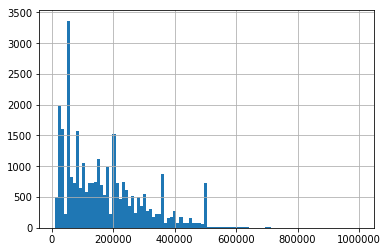

In [108]:
#TODO
from matplotlib import pyplot as plt
df['LIMIT_BAL'].hist(bins = 100)

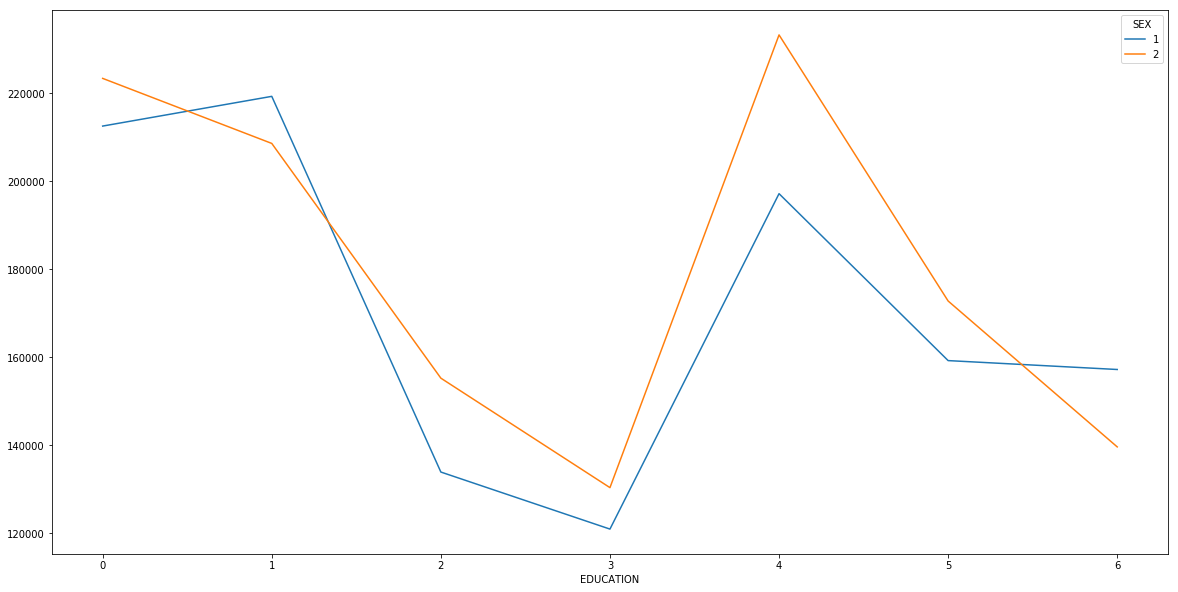

In [138]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
#TODO
fig, ax = plt.subplots(figsize=(20,10))
df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'mean').plot(ax=ax)#kind='bar', stacked=True, ax = ax)

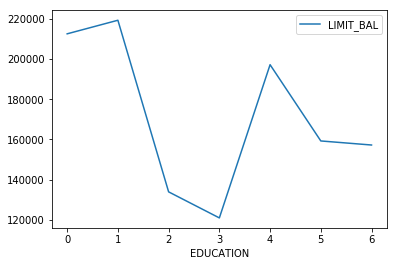

In [137]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO
#fig, ax = plt.subplots(figsize=(20,10))
(df[df['SEX']==1]).pivot_table('LIMIT_BAL', 'EDUCATION', None, 'mean').plot()#kind='bar')#, stacked=True)#, ax = ax)

In [139]:
#plt.plot(df[df['SEX']==1]['EDUCATION'],df[df['SEX']==1]['LIMIT_BAL'],'.')

In [143]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn

#TODO
seaborn.pairplot(df, hue='default.payment.next.month',size = 4)